In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Step 1: Import dataset
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Step2: Split Features and labels
feature_cols = ['Pregnancies','Glucose' , 'BloodPressure','SkinThickness','Insulin','BMI' , 'DiabetesPedigreeFunction' , 'Age']
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
#Step3: Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [7]:
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.neighbors import KNeighborsClassifier

scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    scores.append(score)

print(knn.score(X_test, y_test))

print(classification_report(y_test, y_pred))

0.78125
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.77      0.78      0.77       192



In [5]:
#Step4: USe KNN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.7725694444444444
[0.71875, 0.6979166666666666, 0.765625, 0.7552083333333334, 0.7604166666666666, 0.7604166666666666, 0.7604166666666666, 0.7708333333333334, 0.78125]


In [6]:
#step5: Compute the metrics
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.77      0.78      0.77       192



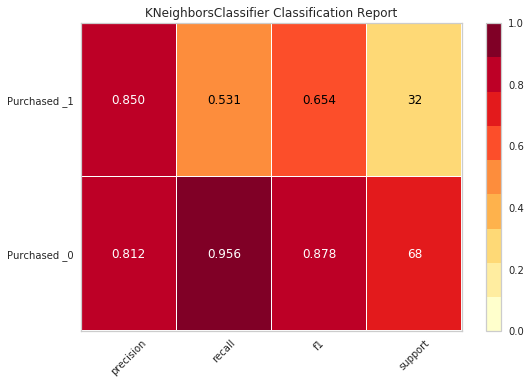

In [ ]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
classes = ["Purchased _0","Purchased _1"]

visualizer = ClassificationReport(knn, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure